+ Title: Exploration of Indian Startup funding data (Kaggle)
+ Author: Gaurav Modi
+ Date: 2018-03-23
+ Description: "Exploration of Indian Startup funding data"
+ Slug: kaggle_indian_startup_funding_exploration
+ Tags: eda, python, matplotlib, seaborn

+ Data Source: https://www.kaggle.com/sudalairajkumar/indian-startup-funding/data
+ Notebook on Kaggle: https://www.kaggle.com/modigaurav/time-series-analysis-and-exploration-in-python

### Importing Packages

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from pysqldf import SQLDF; sqldf = SQLDF(globals()); q = getattr(sqldf, 'execute')
import warnings; warnings.filterwarnings('ignore')
from fast import *

%reload_ext autoreload
%autoreload 2

%matplotlib inline
sns.set(style='darkgrid')
pd.set_option('display.float_format', lambda x: '{:f}'.format(x))

PATH = '../data'

### Reading data

In [2]:

date_parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y')

df = pd.read_csv(f'{PATH}/startup_funding.csv', 
                 date_parser=date_parser, parse_dates=['Date'], 
                 thousands=',')

df.drop(columns=['SNo'], axis=1, inplace=True)

add_datepart(df, 'Date')
df['Month'+'_'+'Year'] = df['Date_Month'].astype('str') + '-' + df['Date_Year'].astype('str')
df['Date_quarter'] = (df.Date_Month-1)//3 + 1    

df.InvestmentType = df.InvestmentType.str.split(pat=" ").str.join(sep='').str.lower()
df.IndustryVertical = df.IndustryVertical.str.lower()

df['rank'] = df.sort_values(['Date_Year', 'Date_Month'])\
               .groupby(['Date_Year', 'Date_Month'])['AmountInUSD'].rank(ascending=False)

In [3]:
display(df.head())

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter,rank
0,2017-08-01,TouchKin,technology,Predictive Care Platform,Bangalore,Kae Capital,privateequity,1300000.000000,NaN,2017,8,31,1,Tuesday,1,213,8-2017,3,1.000000
1,2017-08-02,Ethinos,technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,privateequity,nan,NaN,2017,8,31,2,Wednesday,2,214,8-2017,3,nan
2,2017-08-02,Leverage Edu,consumer internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,nan,NaN,2017,8,31,2,Wednesday,2,214,8-2017,3,nan
3,2017-08-02,Zepo,consumer internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000.000000,NaN,2017,8,31,2,Wednesday,2,214,8-2017,3,3.000000
4,2017-08-02,Click2Clinic,consumer internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000.000000,NaN,2017,8,31,2,Wednesday,2,214,8-2017,3,2.000000


### Data Summary

In [4]:
describe(df)

No. of Rows.:2372
No. of Columns:19



,Data Type,Null Count,Not Null Count,Unique Count
Date,datetime64[ns],0,2372,695
StartupName,object,0,2372,2001
IndustryVertical,object,171,2201,728
SubVertical,object,936,1436,1364
CityLocation,object,179,2193,71
InvestorsName,object,8,2364,1885
InvestmentType,object,1,2371,4
AmountInUSD,float64,847,1525,328
Remarks,object,1953,419,69
Date_Year,int64,0,2372,3


,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Dayofweek,Date_Dayofyear,Date_quarter,rank
count,1525.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,1525.000000
mean,12031073.099016,2015.792159,6.129427,24.984823,15.337690,2.029933,170.869730,2.381113,25.941639
std,64031175.128736,0.733754,3.375506,14.794864,8.710841,1.478779,103.041844,1.096652,15.681256
min,16000.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,370000.000000,2015.000000,3.000000,12.000000,8.000000,1.000000,83.000000,1.000000,13.000000
50%,1070000.000000,2016.000000,6.000000,24.000000,15.000000,2.000000,166.000000,2.000000,25.000000
75%,6000000.000000,2016.000000,9.000000,37.000000,23.000000,3.000000,258.000000,3.000000,38.000000
max,1400000000.000000,2017.000000,12.000000,53.000000,31.000000,6.000000,365.000000,4.000000,70.000000


### Data Exploration

### Distribution of investments count across different cities

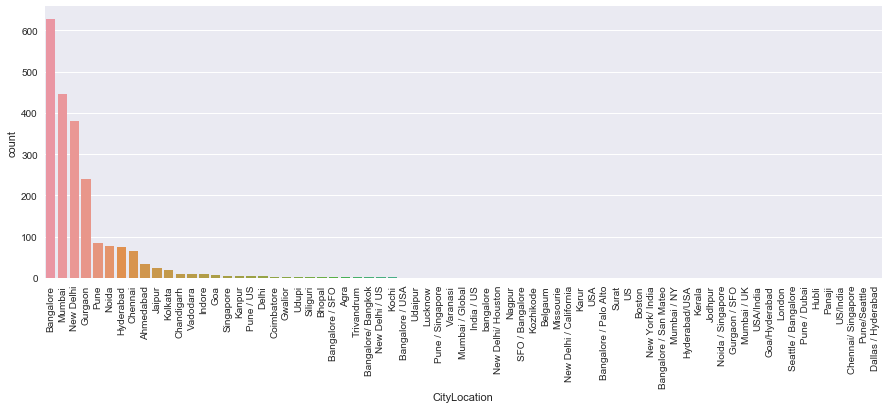

In [5]:
plt.subplots(figsize=(15,5))
p1 = sns.countplot(x = 'CityLocation',
              data = df,
              order = df['CityLocation'].value_counts().index)

plt.xticks(rotation=90);

### Total amount invested over months

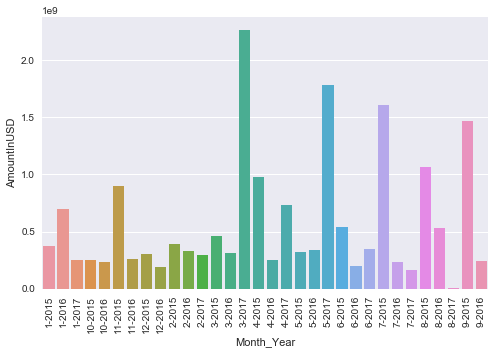

In [6]:
df_temp = df.groupby(['Month_Year']).agg({'AmountInUSD': 'sum'}).reset_index()

plt.subplots(figsize=(8,5))
sns.barplot(x = 'Month_Year', y='AmountInUSD', data = df_temp)
plt.xticks(rotation=90);

### Count of Funding in each month

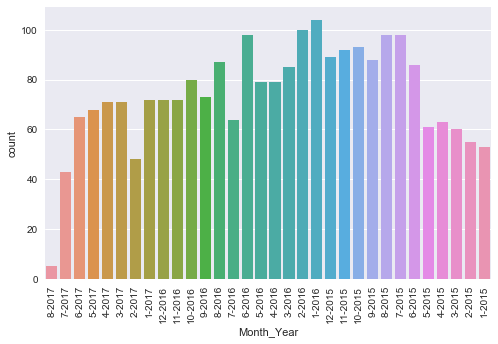

In [7]:
plt.subplots(figsize=(8,5))
sns.countplot(x = 'Month_Year', data = df)

plt.xticks(rotation=90);

### When funding was declared 

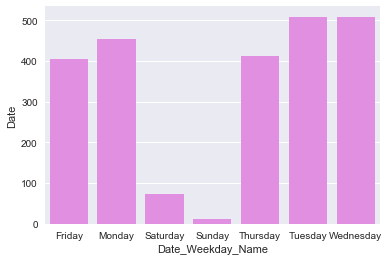

In [8]:
temp = df.groupby(['Date_Weekday_Name']).agg({'Date':'count'}).reset_index()
sns.barplot(x=temp.Date_Weekday_Name, y=temp.Date, color='violet')

### Distribution of funding for sum of below $1M

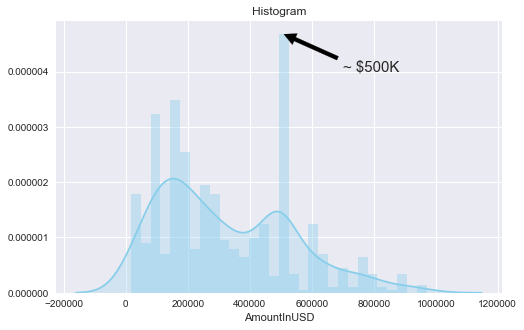

In [9]:
ax = histogram(df.AmountInUSD, upper=10**6, bins=30, color='skyblue')
ax.annotate('~ $500K', xy=(500000, 4.7e-6), xytext=(700000, 4e-6),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15);
plt.title('Histogram');

### When funding was announced for big investments

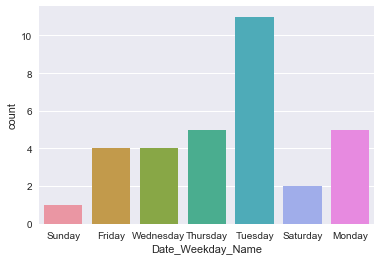

In [10]:
temp = df[df['rank'] == 1].sort_values('Date')
sns.countplot(x=temp.Date_Weekday_Name);

### Investment Type Distribution

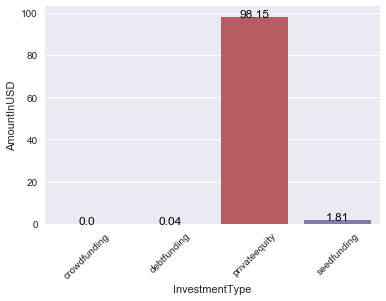

In [11]:
temp = df.groupby(['InvestmentType']).agg({'AmountInUSD':'sum'}).reset_index()
temp.AmountInUSD = 100*temp.AmountInUSD/np.sum(temp.AmountInUSD)
g = sns.barplot(x=temp.InvestmentType, y=temp.AmountInUSD)
for index, row in temp.iterrows():
    g.text(row.name,row.AmountInUSD, round(row.AmountInUSD,2), color='black', ha="center")
plt.xticks(rotation=45);

### Industry Vertical Distribution

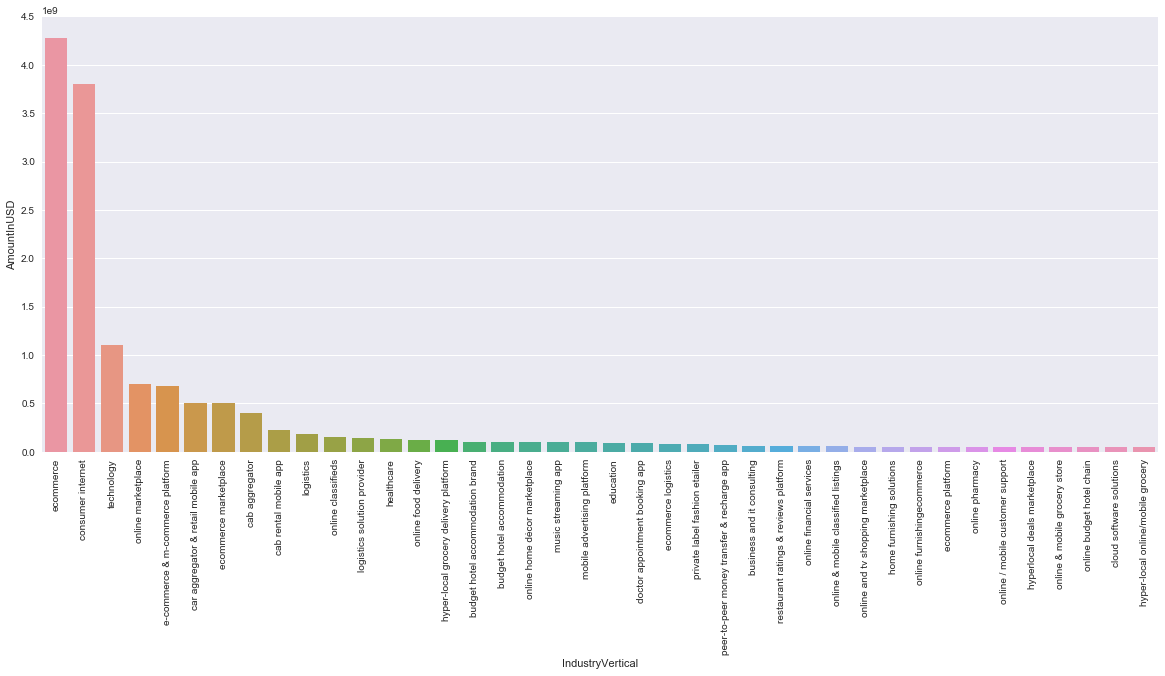

In [12]:
temp = df.groupby(['IndustryVertical']).agg({'AmountInUSD':'sum'}).reset_index()\
  .sort_values('AmountInUSD', ascending=False).reset_index(drop=True).iloc[:40, ]
    
plt.subplots(figsize=(20,8))
sns.barplot(x=temp.IndustryVertical, y=temp.AmountInUSD)
plt.xticks(rotation=90);